In [1]:
import sys,os

RES_PATH = '/Users/juliusuberall/Documents/00_WORK/01_REPOs/COMP0119_24-25/resources'

if not os.path.exists(RES_PATH):
    print( 'cannot find /resources, please update RES_PATH')
    exit(1)
else:
    print('found resources')

import pyglet
pyglet.options['shadow_window'] = False

import pyrender
import numpy as np
import trimesh

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

found resources


## Load a mesh 

In [2]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 
mm = trimesh.load(mesh_fp) 


## Create a scene object and add a mesh

In [3]:
scene = pyrender.Scene(ambient_light=0.5*np.array([1.0, 1.0, 1.0, 1.0]))

mesh = pyrender.Mesh.from_trimesh(mm)
scene.add(mesh)

## Create a customized OpenGL camera

In [4]:
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
camera_pose = np.eye(4)
camera_pose[2,2]=-1
camera_pose[:3,3] = np.array((0.0, 0.0,-10))

## Add camera

In [5]:
scene.add(camera, pose=camera_pose)

## Launch OffscreenRenderer

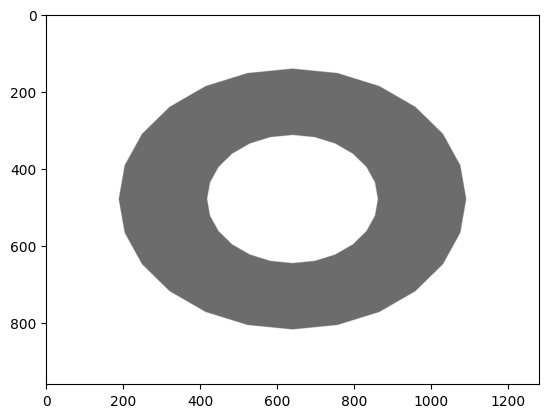

In [6]:
def run_off():   
    r = pyrender.OffscreenRenderer(viewport_width=640*2, viewport_height=480*2)
    color, depth = r.render(scene)
    r.delete()

    plt.figure()
    plt.imshow(color) 

run_off()

In [ ]:
#If you get the error "AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead." then please
#open ~/miniconda3/envs/geo_tutorials/lib/python3.9/site-packages/pyrender/mesh.py , go to line 87
# and replace all instances of np.infty by np.inf.

#It should open a window outside of the browser.

v=pyrender.Viewer(scene, use_raymond_lighting=True)

# To close the viewer, you might need to stop the ipynb kernel (kernel -> shut down kernel)